# Integrating quantum kernels into scikit-learn

This notebook provides a didactic template to use *scikit-learn*'s **support vector machine** in combination with a **quantum kernel**. The quantum kernel is a dummy function that you can fill with life yourself!

In [1]:
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Preliminaries

The quantum kernel -- as any other real-valued kernel -- is a function that takes two data inputs x1 and x2 and maps them to a real number. Here we always return zero to use the function as a dummy or placeholder.

In [2]:
def kernel(x1, x2):
    # Compute the quantum kernel with your favourite quantum computing framework here...
    return 0

Scikit-learn's Support Vector Machine estimator takes kernel Gram matrices. We therefore create a function that, given two lists of data points A and B, computes the Gram matrix whose entries are the pairwise kernels

In [3]:
def gram(A, B):
    gram = np.zeros((len(A), len(B)))
    for id1, x1 in enumerate(A):
        for id2, x2 in enumerate(B):
            gram[id1, id2] = kernel(x1, x2)
    return gram

Let's look at an example where we feed one list of data points into both slots. Of course, our dummy kernel returns only zeros.

In [4]:
data = [[1, 2], [3, 4]]

gram(data, data)

array([[0., 0.],
       [0., 0.]])

Another example constructs rectangular gram matrices from two data lists of different length. This will be useful for new predictions.

In [5]:
data1 = [[1, 2], [3, 4]]
data2 = [[2, 4]]

gram(data1, data2)

array([[0.],
       [0.]])

### Data preparation

Let's load the good old Iris dataset and split it into training and test set

In [6]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

If you have matplotlib installed, you can plot the first of four dimensions.

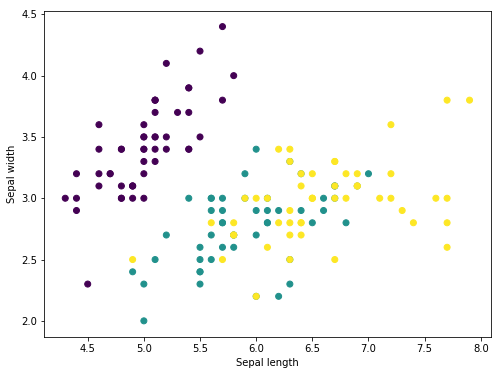

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(2, figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

To prepare the data for the SVM with custom kernel, we have to compute two different Gram matrices for the iris datasets. The "training Gram matrix" computes kernels on pairwise entries of the training set, while the "test Gram matrix" combines training and test set.

In [8]:
gram_train = gram(X_train, X_train)
gram_test = gram(X_test, X_train)

### Training

Now we can train a Support Vector Machine and, for example, compute the accuracy on the test set. We have to select the 'precomputed' option to feed custom kernels. 

The fitting function takes the "training gram matrix". To make predictions on the test set using the trained model, we have to feed it the "test Gram matrix".

In [9]:
svm = SVC(kernel='precomputed')
svm.fit(gram_train, y_train)

predictions_test = svm.predict(gram_test)
accuracy_score(predictions_test, y_test)

0.2894736842105263

Of course, the accuracy is just an artefact of the dummy kernel. Use your favourite quantum computing framework to insert your own kernel!